In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pims
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 16
from matplotlib.animation import FuncAnimation

from scipy.optimize import curve_fit
import os


video 1

In [53]:
AC_video1_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1_v2.csv' )
ids_AC_video1 = AC_video1_dataframe['Track ID'].unique()
AC_positions = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1.csv')
AC_names =AC_positions[['label']].values
AC_names = AC_names[:,0]
AC_video1_dataframe = AC_video1_dataframe.drop(columns=['Unnamed: 0'])
AC_video1_dataframe = AC_video1_dataframe.dropna()
# AC_video1_dataframe[AC_video1_dataframe['Classification']=='Before_Contact']['Track ID'].unique()
AC_video1_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2338,0,27.565505,118.990521,3.343005,1,Back,1.037898,0.268966,-0.144828,0.305479
2,2343,0,28.186505,118.852521,6.686010,2,Back,2.689966,0.186207,-0.041379,0.190749
3,2347,0,28.876505,118.645522,10.029015,3,Back,5.560850,0.206897,-0.062069,0.216006
4,2350,0,29.290505,118.455771,13.372020,4,Back,7.910702,0.124138,-0.056897,0.136556
5,2353,0,29.911505,117.990021,16.715025,5,Back,12.717826,0.186207,-0.139655,0.232759
...,...,...,...,...,...,...,...,...,...,...,...
6055,31325,30,101.688768,109.296020,658.571987,197,Back,4562.105222,0.000000,0.000000,0.000000
6056,31328,30,101.533518,109.347770,661.914993,198,Back,4541.280605,-0.046552,0.015517,0.049070
6057,31331,30,101.533518,109.347770,665.257997,199,Back,4541.280605,0.000000,0.000000,0.000000
6058,31334,30,101.533518,109.347770,668.601003,200,Back,4541.280605,0.000000,0.000000,0.000000


Video 2

In [56]:

AC_video2_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2_v2.csv')
ids_AC_video2 = AC_video2_dataframe['Track ID'].unique()
ACs_pos_DF = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2.csv',usecols=['X','Y'])
AC_positions = ACs_pos_DF.values
# AC_positions.shape
AC_names = ['A','B','C','D','E','F','G','H','I','J','K','L', 'M']
ids_that_touched_AC = [30,34,2,3,20,9,5,15,13,10,1,6]
AC_video2_dataframe = AC_video2_dataframe.drop(columns=['Unnamed: 0'])
AC_video2_dataframe = AC_video2_dataframe.dropna()
AC_video2_dataframe

,spot ID,Track ID,x (micron),y (micron),T (sec),Frame,Classification,squared displacement,vx,vy,speed
1,3033,0,120.681022,99.049518,3.346569,1,Before_Contact,0.053561,-0.031035,-0.062069,0.069395
2,3037,0,120.784522,99.153018,6.693138,2,Before_Contact,0.010712,0.031035,0.031034,0.043889
3,3042,0,120.370522,99.153018,10.039707,3,Before_Contact,0.182108,-0.124138,0.000000,0.124138
4,3045,0,120.474022,99.049518,13.386276,4,Before_Contact,0.139259,0.031034,-0.031034,0.043889
5,3048,0,120.370522,99.256518,16.732845,5,Before_Contact,0.171396,-0.031034,0.062069,0.069395
...,...,...,...,...,...,...,...,...,...,...,...
6055,148879,34,149.385027,52.819510,659.274078,197,Back,455.107129,0.082759,0.010345,0.083403
6056,148882,34,149.385027,52.716010,662.620647,198,Back,458.785003,0.000000,-0.031034,0.031034
6057,148885,34,149.730027,52.819510,665.967215,199,Back,463.426981,0.103448,0.031034,0.108003
6058,148888,34,149.730027,52.819510,669.313784,200,Back,463.426981,0.000000,0.000000,0.000000


Video 5

In [58]:
video=5
AC_video5_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/AC_positions_video5_v2.csv')
ids_AC_video5 = AC_video5_dataframe['Track ID'].unique()
AC_positions = np.loadtxt('data/apoptotic_cells/bigger_videos/video_5/AC_positions.dat')
AC_video5_dataframe = AC_video5_dataframe.dropna()
AC_video5_dataframe = AC_video5_dataframe.drop(columns=['Unnamed: 0'])
AC_video5_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2050,0,70.690513,40.882507,3.348253,1,After_Contact,0.005356,0.015517,-0.015517,0.021945
2,2053,0,70.690513,40.882507,6.696506,2,After_Contact,0.005356,0.000000,0.000000,0.000000
3,2056,0,70.690513,40.986007,10.044759,3,After_Contact,0.005356,0.000000,0.031034,0.031034
4,2059,0,70.690513,40.986007,13.393013,4,After_Contact,0.005356,0.000000,0.000000,0.000000
5,2062,0,70.690513,40.986007,16.741266,5,After_Contact,0.005356,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6203,73762,30,116.230521,39.123007,656.257614,196,Before_Contact,277.715182,0.010345,-0.010345,0.014630
6204,73765,30,116.368521,39.261007,659.605867,197,Before_Contact,271.554445,0.041379,0.041379,0.058519
6205,73768,30,116.023521,39.364507,662.954120,198,Before_Contact,273.838536,-0.103448,0.031034,0.108003
6206,73771,30,115.920021,39.433507,666.302373,199,Before_Contact,273.473128,-0.031034,0.020690,0.037299


function to stop and go vs distance to nearest apoptotic cell

In [2]:
def mov_not_mov(A,th):
    """
    Calculate moving and non moving steps.
    
    Parameters
    -----------
    A = array with the values to be analyzed, it can be the smoothed speed or the speed 
    
    th = threshold (taken from the prob of moving and prob of not moving)
    
    Return
    -------
    
    tuple: 
    
    (ns,ms,signal) = (list with NOT moving steps, list with MOVING steps,binary signal (+1 if this step and the next is above threshold, 0 if below))
     
    """
    
    # mask is an array that in each element has True if the value of array A is less than the threshold
    mask = A <= th
    signal = [] # binary signal

    
    n=0 # counter for non moving steps
    m=0 # counter for moving steps
    ns=[] # list with consecutive non moving steps
    ms = [] # list with consecutive moving steps
    
    for i in range(len(A)-1):
        
        if mask[i] == True and mask[i+1] == True: # if this value in A and the next are below the threshold
            
            # print('n=',n)
            if m!=0: # append the current running value of m if we changed from moving to non moving
                
                ms.append(m)
            m=0 # reset the counter for moving steps
            signal.append(0) # append 0 to the signal
            n+=1 # begin counting non moving steps
        elif mask[i] == False or mask[i+1] == False: 
            # same as before but with the opposite condition
            if n!=0:
                
                ns.append(n)
            n=0
            signal.append(1)
            m+=1
        if i+1 == len(A)-1: 
            # if we are in the last element of A, we append the last values of n,m and the signal
            if mask[i] == False or mask[i+1] == False:
                signal.append(1)
                ms.append(m)
            else:
                signal.append(0)
                ns.append(n)
    return ns,ms,signal
            

calculate auto-correlation

In [43]:
# calculating the different time filter for the three videos with apoptotic cells


videos = [1,2,5]
dataframes = [AC_video1_dataframe,AC_video2_dataframe,AC_video5_dataframe]


for i in range(3):
    dataframe = dataframes[i]
    video = videos[i]
    
    
    dataframe['diff time autocorrelation'] = 0.0 # creating a new column for the different time filter
    ids = dataframe['Track ID'].unique() # ids of bacteria trajectories

    for id in ids: 
        traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame') # sorting the trajectory by time
        vx,vy = traj['vx'].values,traj['vy'].values # x and y velocities
        time = traj['Frame'] # real time in trahectory
        corr = [0.0]
        for i in range(len(time)-1):
            auxcorr = vx[i]*vx[i+1] + vy[i]*vy[i+1] 
            corr.append(auxcorr)
        
        # dataframe=dataframe[dataframe['Track ID']==id]
        # dataframe['diff time autocorrelation'] = corr
        dataframe.loc[dataframe['Track ID']== id,'diff time autocorrelation'] = corr

    dataframe.to_csv(f'data/apoptotic_cells/bigger_videos/video_{video}/video{video}_wcorr.csv')

    dataframe


calculating distance to nearest AC

video 1

In [54]:

video = 1
dataframe1 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/video1_wcorr.csv',index_col=0)

dataframe1

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed,diff time autocorrelation
1,2338,0,27.565505,118.990521,3.343005,1,Back,1.037898,0.268966,-0.144828,0.305479,0.000000
2,2343,0,28.186505,118.852521,6.686010,2,Back,2.689966,0.186207,-0.041379,0.190749,0.056076
3,2347,0,28.876505,118.645522,10.029015,3,Back,5.560850,0.206897,-0.062069,0.216006,0.041094
4,2350,0,29.290505,118.455771,13.372020,4,Back,7.910702,0.124138,-0.056897,0.136556,0.029215
5,2353,0,29.911505,117.990021,16.715025,5,Back,12.717826,0.186207,-0.139655,0.232759,0.031061
...,...,...,...,...,...,...,...,...,...,...,...,...
6055,31325,30,101.688768,109.296020,658.571987,197,Back,4562.105222,0.000000,0.000000,0.000000,0.000000
6056,31328,30,101.533518,109.347770,661.914993,198,Back,4541.280605,-0.046552,0.015517,0.049070,0.000000
6057,31331,30,101.533518,109.347770,665.257997,199,Back,4541.280605,0.000000,0.000000,0.000000,0.000000
6058,31334,30,101.533518,109.347770,668.601003,200,Back,4541.280605,0.000000,0.000000,0.000000,0.000000


The next cells are to modify the .csv file with the trajectories to add the distance to nearest apoptoti cell. 

In [55]:
    
ids = dataframe1['Track ID'].unique()
dataframe1['distance to nearest AC'] = 0.0

for id in ids: 
    traj = dataframe1[dataframe1['Track ID']== id].sort_values('Frame')
    
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]


    
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for name in AC_names:
            x_AC = AC_positions[AC_positions['label']==name]['x (micron)'].values[0]
            y_AC = AC_positions[AC_positions['label']==name]['y (micron)'].values[0]
            dist = np.sqrt((x_AC-X[t])**2+(y_AC-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
    dataframe1.loc[dataframe1['Track ID']== id,'distance to nearest AC'] = min_dist
dataframe1.to_csv('data/apoptotic_cells/bigger_videos/video_1/video1_wcorr_wdistance.csv')
dataframe1

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed,diff time autocorrelation,distance to nearest AC
1,2338,0,27.565505,118.990521,3.343005,1,Back,1.037898,0.268966,-0.144828,0.305479,0.000000,43.081888
2,2343,0,28.186505,118.852521,6.686010,2,Back,2.689966,0.186207,-0.041379,0.190749,0.056076,42.561570
3,2347,0,28.876505,118.645522,10.029015,3,Back,5.560850,0.206897,-0.062069,0.216006,0.041094,42.008521
4,2350,0,29.290505,118.455771,13.372020,4,Back,7.910702,0.124138,-0.056897,0.136556,0.029215,41.705692
5,2353,0,29.911505,117.990021,16.715025,5,Back,12.717826,0.186207,-0.139655,0.232759,0.031061,41.332554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,31325,30,101.688768,109.296020,658.571987,197,Back,4562.105222,0.000000,0.000000,0.000000,0.000000,43.069413
6056,31328,30,101.533518,109.347770,661.914993,198,Back,4541.280605,-0.046552,0.015517,0.049070,0.000000,42.914553
6057,31331,30,101.533518,109.347770,665.257997,199,Back,4541.280605,0.000000,0.000000,0.000000,0.000000,42.914553
6058,31334,30,101.533518,109.347770,668.601003,200,Back,4541.280605,0.000000,0.000000,0.000000,0.000000,42.914553


video 2

In [57]:
dataframe2 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/video2_wcorr.csv',index_col=0)
dataframe2['distance to nearest AC'] = 0.0
for i,id in enumerate(ids_AC_video2):
    traj= dataframe2[dataframe2['Track ID'] == id].sort_values('Frame')
    
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)

        min_dist.append(distante_to_nearestAC)
    dataframe2.loc[dataframe2['Track ID']== id,'distance to nearest AC'] = min_dist

dataframe2.to_csv('data/apoptotic_cells/bigger_videos/video_2/video2_wcorr_wdistance.csv')
dataframe2

,spot ID,Track ID,x (micron),y (micron),T (sec),Frame,Classification,squared displacement,vx,vy,speed,diff time autocorrelation,distance to nearest AC
1,3033,0,120.681022,99.049518,3.346569,1,Before_Contact,0.053561,-0.031035,-0.062069,0.069395,0.000000,23.828909
2,3037,0,120.784522,99.153018,6.693138,2,Before_Contact,0.010712,0.031035,0.031034,0.043889,-0.002889,23.683206
3,3042,0,120.370522,99.153018,10.039707,3,Before_Contact,0.182108,-0.124138,0.000000,0.124138,-0.003853,23.948726
4,3045,0,120.474022,99.049518,13.386276,4,Before_Contact,0.139259,0.031034,-0.031034,0.043889,-0.003853,23.961230
5,3048,0,120.370522,99.256518,16.732845,5,Before_Contact,0.171396,-0.031034,0.062069,0.069395,-0.002889,23.869854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,148879,34,149.385027,52.819510,659.274078,197,Back,455.107129,0.082759,0.010345,0.083403,0.000000,5.459219
6056,148882,34,149.385027,52.716010,662.620647,198,Back,458.785003,0.000000,-0.031034,0.031034,-0.000321,5.357124
6057,148885,34,149.730027,52.819510,665.967215,199,Back,463.426981,0.103448,0.031034,0.108003,-0.000963,5.525834
6058,148888,34,149.730027,52.819510,669.313784,200,Back,463.426981,0.000000,0.000000,0.000000,0.000000,5.525834


video 5

In [65]:
dataframe5 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/video5_wcorr.csv',index_col=0)
dataframe5['distance to nearest AC'] = 0.0
for i,id in enumerate(ids_AC_video5):
    
    traj = dataframe5[dataframe5['Track ID']==id].sort_values('Frame')
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
    dataframe5.loc[dataframe5['Track ID']==id,'distance to nearest AC'] = min_dist
dataframe5.to_csv('data/apoptotic_cells/bigger_videos/video_5/video5_wcorr_wdistance.csv')

Calculating the consecutive number of moving and non moving time steps for videos with AC for the first time

video 1

In [205]:

moving_all = []
not_moving_all = []
signal_all = []
colors = []
for id in ids_AC_video1:
    traj =dataframe1[dataframe1['Track ID'] == id].sort_values('Frame')
    Corr = abs(traj['diff time autocorrelation'].values)
    Corr = Corr/max(Corr)
    move,not_move,signal = mov_not_mov(Corr,0.11)
    
    moving_all.append(move)
    not_moving_all.append(not_move)
    signal_all.append(signal)
    color = ['blue' if value == 1 else 'red' for value in signal]
    colors.append(color)
    

plotting the distance to AC vs the correlation

In [ ]:
for id in ids_AC_video1:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    traj = dataframe1[dataframe1['Track ID'] == id].sort_values('Frame')
    classif = traj['Classification'].values[0]
    C = abs(traj['diff time autocorrelation'])
    C= C/max(C)
    time = traj['Frame']
    distance = traj['distance to nearest AC']
    distance_norm = distance/max(distance)
    ax[0].plot(time,C,label='auto-correlation')
    ax[0].plot(time,distance_norm,label='distance to nearest AC')
    ax[0].set_xlabel('frame')
    fig.suptitle(f'id {id} \n classification : {classif}',fontsize=15)
    
    ax[0].legend(fontsize=13)
    ax[1].scatter(distance,C)
    ax[1].set_xlabel('distance')
    ax[1].set_ylabel('auto-correlation')
    plt.show()
    
    
    

# distance and steps moving and not moving with "1st filter" 

red = not moving 


blue = moving


In [ ]:

for i,id in enumerate(ids_AC_video1):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    traj = dataframe1[dataframe1['Track ID'] == id].sort_values('Frame')
    classif = traj['Classification'].values[0]
    C = abs(traj['diff time autocorrelation'])
    C= C/max(C)
    time = traj['Frame']
    distance = traj['distance to nearest AC']
    sd = traj['squared displacement']
    # ax.scatter(time,signal_all[i],color=colors[i],s=1.5)
    ax[0].scatter(time,sd,s=3.5,color=colors[i])
    ax[0].set_ylabel('squared displacement')
    ax[1].scatter(time,distance,s=3.5,color=colors[i])
    ax[1].set_ylabel('distance to nearest AC')
    # ax.set_ylabel('distance to nearest AC (microns)')
    for a in ax:
        a.set_xlabel('frame')
        a.set_xticks(np.arange(0,220,20))
    fig.suptitle(f'id {id} \n classif : {classif}',fontsize=15)
    fig.tight_layout()
    
    plt.show()

# With the smoothed speed

In [2]:
def Corr_2(T_steps, a,b):
    """

        Computes the autocorrelation function for two input sequences `a` and `b` over a specified number of time steps.
        Parameters:
        T_steps (int): The total number of time steps to consider for the autocorrelation calculation.
        a (array-like): The first input sequence.
        b (array-like): The second input sequence.
        Returns:
        tuple: A tuple containing:
            - Corr (numpy.ndarray): The normalized by the first value autocorrelation values.
            - tau_time (numpy.ndarray): The corresponding time lags (tau) for the autocorrelation values.
    """
    
    
    Corr=np.zeros(int(T_steps/1))
    tau_time = np.zeros(int(T_steps/1))

    for tau in range(int(T_steps/1)):
        
        auxC=0
        cont = 0
        for t in range(0,T_steps-tau): 
            auxC=auxC+a[t]*a[t+tau]+b[t]*b[t+tau]
            
            cont=cont+1
        if cont==0:
            break
        
        auxC = auxC/cont
        Corr[tau]=auxC
        tau_time[tau] = tau   
    
    return Corr/Corr[0], tau_time

In [3]:
# importing the dataframes with the autocorelation and the distance to the nearest apoptotic cell for the three videos

dataframe1 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/video1_wcorr_wdistance.csv',index_col=0)
dataframe2 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/video2_wcorr_wdistance.csv',index_col=0)
dataframe5 = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/video5_wcorr_wdistance.csv',index_col=0)
dataframes_AC = [dataframe1,dataframe2,dataframe5] # list with all the dataframes [1,2,5]
for a in dataframes_AC:
    a.drop(columns=['diff time autocorrelation'])

In [4]:
# calculating the smoothed by one step speed for the three videos and saving it to a separate csv file.

videos_AC = [1,2,5]

step = 1
for i in range(3):
    dataframe = dataframes_AC[i]
    video = videos_AC[i]
    
    
    dataframe['smooth avg speed'] = 0.0
    ids = dataframe['Track ID'].unique()

    for id in ids: 
        traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        speed = traj['speed'].values
        time = traj['Frame']
        corr = list(np.zeros(step))
        for i in range(len(time)-step):
            auxcorr = np.sqrt(speed[i]*speed[i+step])
            corr.append(auxcorr)

        dataframe.loc[dataframe['Track ID']== id,'smooth avg speed'] = corr

    dataframe.to_csv(f'data/apoptotic_cells/bigger_videos/video_{video}/video{video}_wspeedsmooth.csv')



correlation in speed

In [ ]:
from scipy.ndimage import uniform_filter1d

# calculating the autocorrelation for the smoothed speed for the three videos and plotting it next to the smoothed speed for each trajectory with apoptotic cells only until they touch the apoptotic cell

all_videos_speeds_smooth = []

for v in range(3):
    video = videos[v]
    dataframe = dataframes[v]
    ids = dataframe['Track ID'].unique()
    video_speeds = []
    for id in ids[:]: 
        
        traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        t1 = traj['Classification'].values[0]
        if t1 == 'Back':
            traj = traj[traj['Classification']=='Back']
            
        if t1 == 'Before_Contact':
            traj = traj[traj['Classification']=='Before_Contact']
        time,sspeed = traj['Frame'].values,traj['smooth avg speed'].values
        vx = traj['vx'].values
        vy = traj['vy'].values 
        # speed_corr,tau = Corr_2(len(time),sspeed,sspeed)
        v = np.average(sspeed)
        sspeed = sspeed - v # calculating the correlation for the subtracted mean speed
        speed_corr,tau = Corr_2(len(time),sspeed,sspeed) 
        sspeed = sspeed/max(sspeed)
        video_speeds = video_speeds + list(sspeed)
        time,sspeed = time[1:],sspeed[1:]
        running_avg_speed = uniform_filter1d(sspeed,size=3,mode='nearest') #filter to smooth the signal

        fig,ax = plt.subplots(1,2,figsize=(10,4.5))

        ax[0].plot(time,sspeed,label='speed')
        ax[0].plot(time,running_avg_speed,label='running avg')
        ax[0].legend()
        ax[0].set_xlabel('frame')
        ax[0].set_xticks(np.arange(0,len(time)+20,20))
        ax[0].set_ylabel('smooth speed')
        ax[1].plot(tau,speed_corr,lw=1,marker='o',mfc = 'none',ms=2.3)
        ax[1].set_xlabel(r'$\tau$')
        ax[1].set_ylabel(r'$C(t)$')
        ax[1].set_xlim((0,50))
        #ax[1].semilogy()
        fig.suptitle(f'video {video} \n id {id}',fontsize=15)
        plt.tight_layout()
        plt.show()
    all_videos_speeds_smooth.append(video_speeds)

In [5]:
def flatten(xs):
    """
    Recursively flattens a nested list or tuple.
    Args:
        xs (list or tuple): A nested list or tuple to be flattened.
    Returns:
        list: A single list containing all the elements of the input, 
              flattened to a single level.
    Example:
        >>> flatten([1, [2, [3, 4], 5], 6])
        [1, 2, 3, 4, 5, 6]
    """
    
    
    
    
    result = []
    if isinstance(xs, (list, tuple)):
        for x in xs:
            result.extend(flatten(x))
    else:
        result.append(xs)
    return result

In [6]:
def hist_calc(A,bins):
    
    
        """
        Calculate the histogram of a dataset and return the histogram data, bin edges, and bin centers.
        Parameters:
        A (array-like): Input data to be histogrammed.
        bins (int or sequence of scalars): If `bins` is an int, it defines the number of equal-width bins in the range. 
                                           If `bins` is a sequence, it defines the bin edges, including the rightmost edge.
        Returns:
        tuple: A tuple containing:
            - data (ndarray): The values of the histogram.
            - bins1 (ndarray): The edges of the bins.
            - binscenters (ndarray): The centers of the bins.
        """
    
    

        data,bins1=np.histogram(A,bins=bins,density=True)
        binscenters=0.5*(bins1[1:]+bins1[:-1])
        return data,bins1,binscenters

Average over all inst speeds w/o separating per bacterium and with sqrt in the smoothing normalizing speed by maximum

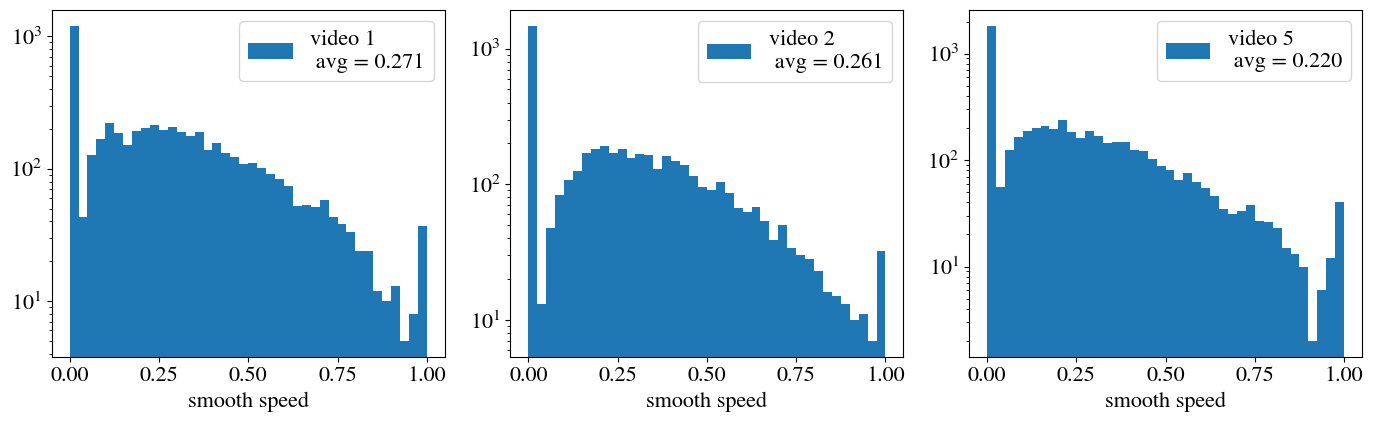

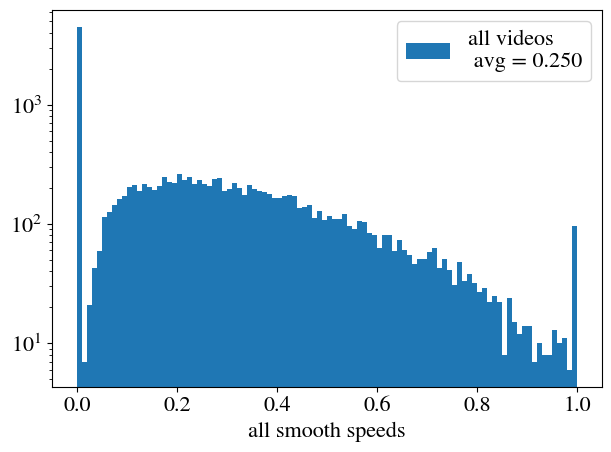

prob of zero = 0.2879 
 prob of not zero = 0.7121
0.9999999999999996


In [395]:
# plotting the histogram of the smoothed speeds for the three videos and all the videos together

data1,bins1,binscenters1 = hist_calc(all_videos_speeds_smooth[0],50)
data2,bins2,binscenters2 = hist_calc(all_videos_speeds_smooth[1],50)
data5,bins5,binscenters5 = hist_calc(all_videos_speeds_smooth[2],50)
datas = [data1,data2,data5]
binss = [bins1,bins2,bins5]
binscenterss = [binscenters1,binscenters2,binscenters5]

data_all,bins_all,binscenters_all = hist_calc(flatten(all_videos_speeds_smooth),80)
data_all = data_all/sum(data_all)

a = bins_all[:-1]
sorted(a)
where = a == 0.0
where2 = a != 0.0
wzero = sum(data_all[where])
nozero = sum(data_all[where2])


fig,ax = plt.subplots(1,3,figsize=(14,4.5))
for i in range(3):
    x = np.array(all_videos_speeds_smooth[i])
    # x = x[x>0.0]
    ax[i].hist(x,label = f'video {videos[i]} \n avg = {np.average(x):.3f}',bins=40)
    ax[i].set_xlabel('smooth speed')
    ax[i].legend()
    ax[i].semilogy()
plt.tight_layout()
plt.show()

fig,ax = plt.subplots()
y = np.array(flatten(all_videos_speeds_smooth))
# y = y[y>0.0]

ax.hist(y,label = f'all videos \n avg = {np.average(y):.3f}',bins=100)
ax.set_xlabel('all smooth speeds')
ax.legend()
# ax.set_xlim((0,0.1))
ax.semilogy()
plt.tight_layout()
plt.show()
print(f'prob of zero = {wzero:.4f} \n prob of not zero = {nozero:.4f}')
print(wzero + nozero)


# smooth then steps

In [75]:
dataframe = dataframes[0]
ids = dataframe['Track ID'].unique()

moving_all = []
not_moving_all = []
signal_all = []
colors = []
for id in ids:
    traj =dataframe[dataframe['Track ID'] == id].sort_values('Frame')
    t1 =traj['Classification'].values[0]
    if t1 == 'Back':
        traj = traj[traj['Classification']=='Back']
    if t1 == 'Before_Contact':
        traj = traj[traj['Classification']=='Before_Contact']


        
  
    
    #     traj = traj[traj['Classification']=='Before_Contact']
    
    sspeed = traj['smooth avg speed'].values
    sspeed = sspeed/max(sspeed)
            # Corr = abs(traj['diff time autocorrelation'].values)
            # Corr = Corr/max(Corr)
    move,not_move,signal = mov_not_mov(sspeed,0.0)
            
    moving_all.append(move)
    not_moving_all.append(not_move)
    signal_all.append(signal)
    color = ['blue' if value == 1 else 'red' for value in signal]
    colors.append(color)

    

In [ ]:
distances = []
distances_flat = []
for i,id in enumerate(ids[:]):    
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame')
    t1 = traj['Classification'].values[0]
    if t1 == 'Back':
        traj = traj[traj['Classification']=='Back']
        
    if t1 == 'Before_Contact':
        traj = traj[traj['Classification']=='Before_Contact']
    
    time = traj['Frame']
    distance = traj['distance to nearest AC'].values
    distances.append(distance)
    distances_flat += list(distance)
    sspeed = traj['smooth avg speed'].values
    sspeed = sspeed/max(sspeed)
    sd = traj['squared displacement']
    # ax.scatter(time,signal_all[i],color=colors[i],s=1.5)
    ax[0].scatter(time,sd,s=3.5,color=colors[i])
        
    ax[0].set_ylabel('squared displacement')
    ax[1].scatter(time,distance,s=3.5,color=colors[i])
    ax[1].set_ylabel('distance to nearest AC')
    # ax.set_ylabel('distance to nearest AC (microns)')
    for a in ax:
        a.set_xlabel('frame')
        a.set_xticks(np.arange(0,len(time)+20,20))
    fig.suptitle(f'id {id} \n classif : {t1}',fontsize=15)
    fig.tight_layout()
    fig1,ax1 = plt.subplots(1,2,figsize=(12,5))
    ax1[0].plot(time,sspeed,lw=0.6,color='black')
    ax1[0].scatter(time,sspeed,s=7,color=colors[i])
    ax1[0].set_ylabel('smooth speed')

    ax1[1].plot(time,signal_all[i],lw=1.7)
    ax1[1].set_ylabel('+1 moving 0 not moving')
    
    for a in ax1:
        a.set_xlabel('frame')
        a.set_xticks(np.arange(0,len(time)+20,20))
        
    fig1.tight_layout()
    plt.show()
  

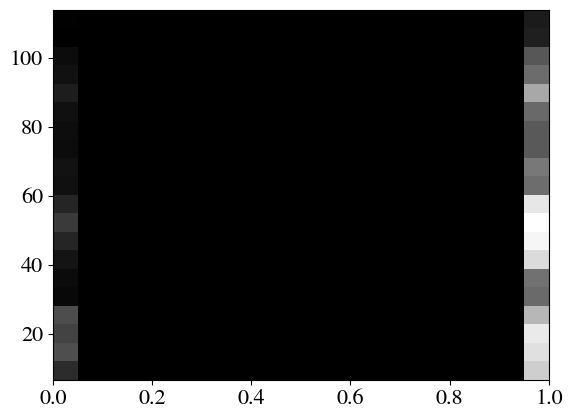

In [462]:
fig, ax = plt.subplots()
x = flatten(signal_all)
y = distances_flat
ax.hist2d(x,y,bins=20,cmap='grey')
# ax.bar(x,y,width=0.2)
plt.show()

# Goodness-of-fit tests 

Below, I calculate the again the consecutive moving and non moving time steps and same them into a dictionary with the signal and the colors indicating the state. 
This is gonna be useful for the histogram of this steps and the fit tests

With apoptotic cells

In [7]:
videos_AC = [1,2,5]
videos_dict_AC = {}



for d,dataframe in enumerate(dataframes_AC):
    ids = dataframe['Track ID'].unique()
    moving_all = []
    not_moving_all = []
    signal_all = []
    colors = []
    for id in ids:
        traj =dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        t1 =traj['Classification'].values[0]
        if t1 == 'Back':
            traj = traj[traj['Classification']=='Back']
        if t1 == 'Before_Contact':
            traj = traj[traj['Classification']=='Before_Contact']
        sspeed = traj['smooth avg speed'].values
        sspeed = sspeed/max(sspeed)
                # Corr = abs(traj['diff time autocorrelation'].values)
                # Corr = Corr/max(Corr)
        move,not_move,signal = mov_not_mov(sspeed,0.2)
                
        moving_all.append(move)
        not_moving_all.append(not_move)
        signal_all.append(signal)
        color = ['blue' if value == 1 else 'red' for value in signal]
        colors.append(color)
    name = videos_AC[d]
    videos_dict_AC[f'video {name}'] = {'moving': moving_all, 'not moving': not_moving_all, 'signal': signal_all, 'colors': colors}
        
        
        

In [10]:
from scipy.stats import kstest,expon,ks_2samp,fatiguelife,goodness_of_fit
from statsmodels.stats.diagnostic import lilliefors

# creating the functions to calculate the p-value and the statistic for the different types of tests


def ktest_video(a,min_steps,max_steps):
    a = a[a < max_steps]
    a = a[a > min_steps]
    
    b = kstest(a,"expon",args = expon.fit(a,scale=a.mean(),floc=0.0))
    return b.pvalue,b.statistic


def ktest_same_video(a,c):
 
    
    b = kstest(a,c)
    return b.pvalue,b.statistic


def fl_test(a,min_steps,max_steps):
    a = a[a < max_steps]
    a = a[a > min_steps]
    b = kstest(a,"fatiguelife",args = fatiguelife.fit(a))
    return b.pvalue,b.statistic
    
def lilliefors_test(a,min_steps,max_steps):
    a = a[a < max_steps]
    a = a[a > min_steps]
    
    b = lilliefors(a,'exp')
    
    return b[1],b[0]

def goodness_of_fit_test(a,min_steps,max_steps):
    a = a[a < max_steps]
    a = a[a > min_steps]
    params = {'loc': 0.0}
    guess = {'scale': np.mean(a)}
    b = goodness_of_fit(expon,a,known_params=params,guessed_params=guess)
    return b.pvalue,b.statistic

In [9]:
def plot_mv_not_mv_for_video(video, dict, title,max_steps, min_steps):
    """
        Plots histograms and exponential fits for 'moving' and 'not moving' data from a given video.
        Parameters:
        video (str): The key for the video in the dictionary.
        dict (dict): A dictionary containing 'moving' and 'not moving' data for each video.
        title (str): The title for the plot.
        max_steps (int): The maximum number of steps to consider for the plot.
        min_steps (int): The minimum number of steps to consider for the plot.
        Returns:
        tuple: A tuple containing the slopes of the exponential fits for 'not moving' and 'moving' data.
    """
    

    
    
    
    
    
    fig,ax = plt.subplots()

    
    a=np.array(flatten(dict[video]['not moving']))
    b=np.array(flatten(dict[video]['moving']))
    mask1 = a < max_steps
    a = a[mask1]
    a = a[a>min_steps]
    b = b[b > min_steps]
    b = b[b<max_steps]
    
    

    
 
    
    P = expon.fit(a,scale=a.mean(),floc=0.0)
    x = np.linspace(1,a.max(),1000)
    rP = expon.pdf(x,*P)
    
    P1 = expon.fit(b,floc=0.0)
    x1 = np.linspace(1,b.max(),1000)
    rP1 = expon.pdf(x1,*P1)
    
    # P = expon.pdf(bins[1:],loc=loc,scale=scale)


    # popt,pcov = curve_fit(exp_fit,bins[1:],data,p0=[5.0])
    # popt1,pcov1 = curve_fit(exp_fit,bins1[1:],data1,p0=[3.0])

    ax.hist(a,bins='auto', label = 'not moving',color='grey',density=True)
    ax.hist(b,bins='auto', label = 'moving',alpha=0.7,color='blue',density=True)

    # ax.plot(x,rP, lw = 0.9, ls = '--',color='black',label = f'slope not moving = {1/P[1]:.3f} \n std = {P[0]:.3f}')
    # kstest_a = ktest_video(a,min_steps,max_steps)
    # labela =  f'slope not moving = {1/P[1]:.3f} \n p-value = {kstest_a[0]: .3e}'
    labela =  f'slope not moving = {1/P[1]:.3f}'
    # kstest_b = ktest_video(b,min_steps,max_steps)
    # labelb =  f'slope moving = {1/P1[1]:.3f} \n p-value = {kstest_b[0]: .3e}'
    labelb =  f'slope moving = {1/P1[1]:.3f}'    
    ax.plot(x,rP, lw = 0.9, ls = '--',color='black',label = labela)

    # ax.plot(x1,rP1, lw = 0.9, ls = '--',color='red',label = f'slope moving = {1/P1[1]:.3f} \n std = {P1[0]:.3f}')
    ax.plot(x1,rP1, lw = 0.9, ls = '--',color='red',label = labelb)

    # ax.plot(bins, exp_fit(bins,*popt),'r--',label=f'not moving slope = {popt[0]:.3f}' )
    # ax.plot(bins1, exp_fit(bins1,*popt1),'g--',label=f'moving slope = {popt1[0]:.3f}' )

    ax.legend(fontsize=9)
    ax.set_title(f'{title}: {video}')
    ax.set_xlabel('consecutive steps')
    ax.semilogy()
    ax.set_xlim(0,max(b.max(),a.max())+1)
    
    plt.show()
    
    return 1/P[1],1/P1[1]



    

The following cell is explained as:

Variables:
- mv_slopesAC: List to store slopes of moving data for each video.
- not_mv_slopesAC: List to store slopes of non-moving data for each video.
- min_steps: Minimum number of steps to consider in the analysis.
- max_steps: Maximum number of steps to consider in the analysis.
For each video in videos_AC:
1. Generate a string identifier for the video.
2. Retrieve the corresponding dictionary from videos_dict_AC.
3. Call plot_mv_not_mv_for_video to get moving and non-moving slopes.
4. Flatten and convert the non-moving and moving data to numpy arrays.
5. Perform and print the results of several statistical tests on the non-moving and moving data:
    - Kolmogorov-Smirnov test (kstest_video)
    - Lilliefors test (lilliefors_test)
    - Goodness of fit test (goodness_of_fit_test)
6. Append the moving and non-moving slopes to their respective lists.


In [ ]:




mv_slopesAC = []
not_mv_slopesAC = []

min_steps = 0
max_steps = 50

for video in videos_AC: 
    v = f'video {video}'
    dict = videos_dict_AC
    mv,nm = plot_mv_not_mv_for_video(v,videos_dict_AC, 'with AC',max_steps,min_steps)
    a=np.array(flatten(dict[v]['not moving']))
    b=np.array(flatten(dict[v]['moving']))
    
    print(v,f'kstest not moving : pvalue = {ktest_video(a,min_steps,max_steps)[0]:.3e}')
    print(v,f'ktest moving : pvalue = {ktest_video(b,min_steps,max_steps)[0]:.3e}')
    
    print(v, f'lilliefors test not moving : pvalue = {lilliefors_test(a,min_steps,max_steps)[0]:.4f}')
    print(v, f'lilliefors test moving : pvalue = {lilliefors_test(b,min_steps,max_steps)[0]:.4f}')
    
    print(v, f' goodness of fit not moving : pvalue = {goodness_of_fit_test(a,min_steps,max_steps)[0]:.4f}')
    print(v, f' goodness of fit moving : pvalue = {goodness_of_fit_test(b,min_steps,max_steps)[0]:.4f}')

    mv_slopesAC.append(mv)
    not_mv_slopesAC.append(nm)

In [ ]:

fig,ax = plt.subplots()



data,bins,centers = hist_calc(a,bins=50)
data1,bins1,centers1 = hist_calc(b,bins=50)

x = np.linspace(0,a.max(),200)
P = expon.fit(a,floc=0.0)
Pf = expon.pdf(x,*P)

x1 = np.linspace(0,b.max(),200)
P1 = expon.fit(b,floc=0.0)
Pf1 = expon.pdf(x1,*P1)

popt,pcov = curve_fit(exp_fit,bins[1:],data,p0=[1.0,0.1,200])
popt1,pcov1 = curve_fit(exp_fit,bins1[1:],data1,p0=[1.0,0.1,200])

ax.hist(a,bins='auto', label = 'not moving',color='grey',density=True)
ax.hist(b,bins='auto', label = 'moving',alpha=0.7,color='blue',density=True)

# ax.plot(x,Pf, lw = 0.9, ls = '--',color='black',label = f'slope = {1/P[1]:.2f}')
# ax.plot(x1,Pf1, lw = 0.9, ls = '--',color='red',label = f'slope = {1/P1[1]:.2f}')

ax.plot(bins, exp_fit(bins,*popt),'r--',label=f'moving slope = {popt[1]:.3f}' )
ax.plot(bins, exp_fit(bins1,*popt1),'g--',label=f'not moving slope = {popt1[1]:.3f}' )

ax.legend(fontsize=13)
ax.set_title('real data: video 1')
ax.set_xlabel('consecutive steps')
ax.semilogy()
plt.show()

Without AC: the same thing as before but WITHOUT AC

In [5]:
videos = [2,3,4]
dataframes = []
for v in videos:
    df = pd.read_csv(f'data/new-videos/video{v}/video{v}data_v10.csv',index_col=0)
    df = df.dropna()

    dataframes.append(df)

step = 1
for i in range(3):
    dataframe = dataframes[i]
    video = videos[i]
    
    
    dataframe['smooth avg speed'] = 0.0
    ids = dataframe['Track ID'].unique()

    for id in ids: 
        traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        speed = traj['speed'].values
        time = traj['Frame']
        corr = list(np.zeros(step))
        for i in range(len(time)-step):
            auxcorr = np.sqrt(speed[i]*speed[i+step])
            corr.append(auxcorr)
        
        # dataframe=dataframe[dataframe['Track ID']==id]
        # dataframe['diff time autocorrelation'] = corr
        dataframe.loc[dataframe['Track ID']== id,'smooth avg speed'] = corr

    dataframe.to_csv(f'data/new-videos/video{video}/video{video}_wspeedsmooth.csv')

In [8]:
videos = [2,3,4]
videos_dict = {}



for d,dataframe in enumerate(dataframes):
    ids = dataframe['Track ID'].unique()
    moving_all = []
    not_moving_all = []
    signal_all = []
    colors = []
    for id in ids:
        traj =dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        sspeed = traj['smooth avg speed'].values
        sspeed = sspeed/max(sspeed)
                # Corr = abs(traj['diff time autocorrelation'].values)
                # Corr = Corr/max(Corr)
        move,not_move,signal = mov_not_mov(sspeed,0.2)
                
        moving_all.append(move)
        not_moving_all.append(not_move)
        signal_all.append(signal)
        color = ['blue' if value == 1 else 'red' for value in signal]
        colors.append(color)
    name = videos[d]
    videos_dict[f'video {name}'] = {'moving': moving_all, 'not moving': not_moving_all, 'signal': signal_all, 'colors': colors}
        
        
        

In [60]:
dataframe = pd.read_csv('data/new-videos/video4/video4data.csv')

dataframe['dt'] = dataframe.groupby('Track ID')['Frame'].diff()
dataframe['vx'] = dataframe.groupby('Track ID')['x (micron)'].diff() / (dataframe['dt']*3.335)
dataframe['vy'] = dataframe.groupby('Track ID')['y (micron)'].diff() / (dataframe['dt']*3.335)
dataframe['speed'] = np.sqrt(dataframe['vx']**2 + dataframe['vy']**2)
dataframe = dataframe.drop(columns=['dt'])

for i in range(6,32):
    dataframe= dataframe.drop(columns=[f'Unnamed: {i}'])

dataframe.to_csv(f'data/new-videos/video4/video4data_v10.csv')
dataframe


,spot ID,Track ID,T (sec),x (micron),y (micron),Frame,vx,vy,speed
0,1123776,5,0.000,21.701,138.104,0,NaN,NaN,NaN
1,1123985,5,3.336,21.683,137.914,1,-0.005397,-0.056972,0.057227
2,1123987,5,6.671,21.735,137.914,2,0.015592,0.000000,0.015592
3,1123989,5,10.007,21.735,137.914,3,0.000000,0.000000,0.000000
4,1123993,5,13.343,21.735,137.914,4,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
12809,1193701,119,1317.595,99.489,74.054,395,-0.038981,-0.046777,0.060890
12810,1193703,119,1320.931,99.282,74.106,396,-0.062069,0.015592,0.063997
12811,1193705,119,1324.267,99.127,73.485,397,-0.046477,-0.186207,0.191920
12812,1193707,119,1327.602,99.127,73.200,398,0.000000,-0.085457,0.085457


In [ ]:
# Consider the same explanation for the following code as the one given for the apoptotic cells


mv_slopes = []
not_mv_slopes = []
min_steps = 0
max_steps = 50
for video in videos[:]: 
    v = f'video {video}'
    dict = videos_dict
    mv,nm = plot_mv_not_mv_for_video(v, videos_dict,"without AC",max_steps=50, min_steps=0)
    a=np.array(flatten(dict[v]['not moving']))
    b=np.array(flatten(dict[v]['moving']))
    
    # print(v, f' moving fatiguelife = {fl_test(b,0,25)}')
    # print(v, f'not moving fatiguelife = {fl_test(a,0,25)}')
    
    
    print(v,f'kstest not moving : pvalue = {ktest_video(a,min_steps,max_steps)[0]:.3e}')
    print(v,f'ktest moving : pvalue = {ktest_video(b,min_steps,max_steps)[0]:.3e}')
    
    print(v, f'lilliefors test not moving : pvalue = {lilliefors_test(a,min_steps,max_steps)[0]:.4f}')
    print(v, f'lilliefors test moving : pvalue = {lilliefors_test(b,min_steps,max_steps)[0]:.4f}')
    
    print(v, f' goodness of fit not moving : pvalue = {goodness_of_fit_test(a,min_steps,max_steps)[0]:.4f}')
    print(v, f' goodness of fit moving : pvalue = {goodness_of_fit_test(b,min_steps,max_steps)[0]:.4f}')
    
    
    
    mv_slopes.append(mv)
    not_mv_slopes.append(nm)
    

General results for consecutive moving time steps and consecutive not moving time steps

Average fitted $\lambda$ for a exponential distribution such that $P(x) = \lambda e^{-\lambda x}$ between 3 videos, with and without AC.  

In [39]:
pd.DataFrame.from_dict({'with AC': {'moving':np.average(mv_slopesAC), 'not moving': np.average(not_mv_slopesAC)}, 'without AC': {'moving': np.average(mv_slopes), 'not moving':np.average( not_mv_slopes)} })

,with AC,without AC
moving,0.139009,0.159584
not moving,0.233868,0.220794


Test to check if the distributions are statistically different per video

With AC

In [ ]:
for video in videos_AC:
    v = f'video {video}'
    dict = videos_dict_AC
    mv,nm = plot_mv_not_mv_for_video(v,videos_dict_AC, 'with AC',max_steps,min_steps)
    a=np.array(flatten(dict[v]['not moving']))
    b=np.array(flatten(dict[v]['moving']))
    

Coin toss test


In [579]:
from scipy.stats import expon


# biased coin test to compare the results from real data to a true poisson process with different rates

ct_moving = []
ct_not_moving = []


n=0
m=0
r = np.random.default_rng()
for t in range(10000):

    r1 = r.random()
    # print(f"prob = {r1}")
    
    if r1 < 0.8:
        if n != 0:
            ct_not_moving.append(n)
           
        
        m += 1
        n=0 
    else:
        if m != 0:
            ct_moving.append(m)
        m=0
        n+=1
   
    # print(f"n = {n}, m = {m}")



if m > 0:
    ct_moving.append(m)
if n > 0:
    ct_not_moving.append(n)
            
        
    
        
 

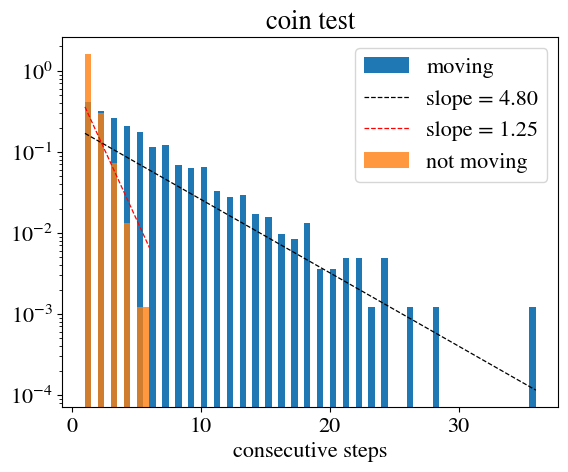

In [580]:
 # plot the coin test
        
fig,ax = plt.subplots()


x = np.linspace(1,np.max(ct_moving),1000)
P = expon.fit(ct_moving,floc=0.0)
Pf = expon.pdf(x,*P)

x1 = np.linspace(1,np.max(ct_not_moving),1000)
P1 = expon.fit(ct_not_moving,floc=0.0)
Pf1 = expon.pdf(x1,*P1)

ax.hist(ct_moving, label = 'moving',density=True,bins=70,histtype='stepfilled')
ax.plot(x,Pf, lw = 0.9, ls = '--',color='black',label = f'slope = {P[1]:.2f}')
ax.plot(x1,Pf1, lw = 0.9, ls = '--',color='red',label = f'slope = {P1[1]:.2f}')
ax.hist(ct_not_moving, label = 'not moving',alpha=0.8,density=True,bins=10,histtype='stepfilled')
ax.set_xlabel('consecutive steps')
ax.set_title('coin test')
ax.semilogy()
ax.legend()
plt.show()
        
        
            

In [582]:
kstest(ct_not_moving,"expon",args=expon.fit(ct_not_moving,floc=0.0))
# lilliefors(ct_moving,dist="exp")

KstestResult(statistic=0.5505405876432772, pvalue=0.0, statistic_location=1, statistic_sign=-1)

### Avg separating individual trajectories w/ sqrt in the speed 

In [203]:
all_videos_speeds_smooth = []

for v in range(3):
    video = videos[v]
    dataframe = dataframes[v]
    ids = dataframe['Track ID'].unique()
    video_speeds = []
    for id in ids[:]: 
        
        traj = dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        time,sspeed = traj['Frame'].values,traj['smooth avg speed'].values
        sspeed = sspeed/max(sspeed)
        # speed_corr,tau = Corr_2(len(time),sspeed,sspeed)
        video_speeds.append(np.average(sspeed))
    all_videos_speeds_smooth.append(video_speeds)